In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})
import numpy as np
from classy import Class

# $C_\ell$ spectrum with lensing correction

In [3]:
lcdm = Class()
lcdm.set({'output':'tCl, lCl, pCl', 'lensing':'yes'})
lcdm.compute()

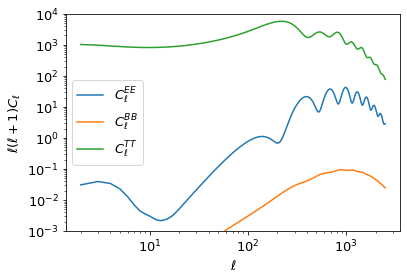

In [70]:
cls = lcdm.lensed_cl()
l = cls['ell'][2:]
clTT = (cls['tt'][2:])*(lcdm.T_cmb()*1e6)**2
clEE = cls['ee'][2:]*(lcdm.T_cmb()*1e6)**2
clBB = cls['bb'][2:]*(lcdm.T_cmb()*1e6)**2


plt.plot(l,clEE*l*(l+1)/(2*np.pi),label = r'$C_\ell ^{EE}$')
plt.plot(l,clBB*l*(l+1)/(2*np.pi) ,label = r'$C_\ell ^{BB}$')
plt.plot(l,clTT*l*(l+1)/(2*np.pi) ,label = r'$C_\ell ^{TT}$')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell (\ell + 1) C_\ell$')

plt.ylim(1e-3,1e4)

plt.xscale('log')
plt.yscale('log')
plt.legend()

# Varying $\Omega_b$

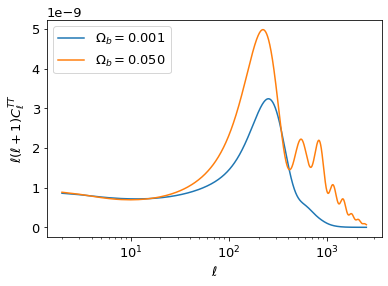

In [12]:
varying_b = Class()
omega_b_list = np.array([1e-3,5e-2])

for b in omega_b_list :
    c = 0.3 - b 
    varying_b.set({ 'Omega_b' : b , 'Omega_cdm' : c, 'output':'tCl', 'YHe' : 0.24})
    varying_b.compute()
    
    cl = varying_b.raw_cl()['tt'][2:]
    l = varying_b.raw_cl()['ell'][2:]
    
    plt.plot(l,l*(l+1)*cl,'-',label= r'$\Omega_b = {:.3f}$'.format(b))
    
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$\ell(\ell+1)C_\ell ^{TT} $')

plt.xscale('log')
plt.legend()